<a href="https://colab.research.google.com/github/trallala9/Cifar10-i-TPU/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os

from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.python.keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

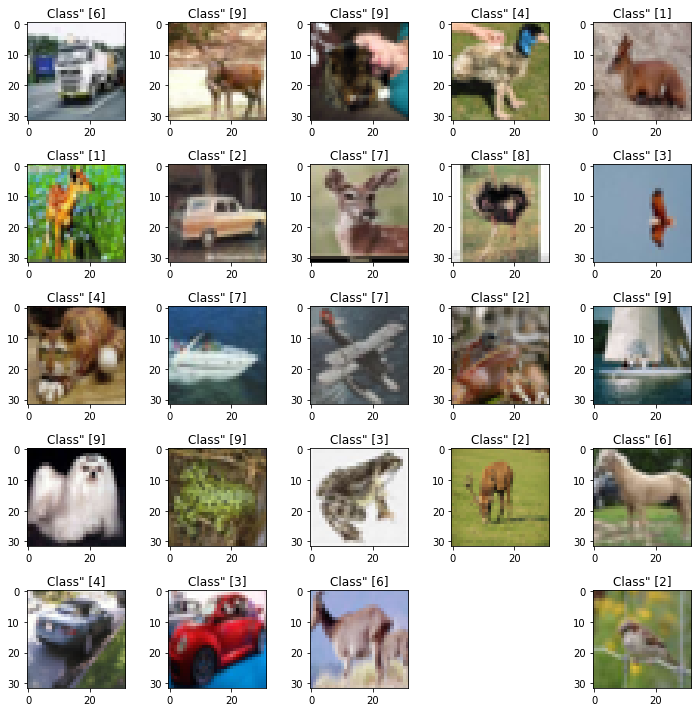

In [0]:
plt.figure(figsize=(10, 10))

for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx+1000], cmap='gray')
    plt.title('Class" {}' .format(y_train[idx]))
    
    plt.tight_layout()

In [0]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)

input_shape = (img_rows, img_cols, num_channels)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255
  

In [0]:
if len(y_train.shape) == 2:
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)



if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [0]:
y_train.shape, y_test.shape, num_classes

((50000, 10), (10000, 10), 10)

In [0]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(33, kernel_size=(3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.25),
           
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 33)        9537      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 33)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 33)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        19072     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [0]:
#TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
#tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
model.fit(X_train, y_train,
         batch_size=128, epochs=3, verbose=2,
         validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 - 10s - loss: 1.8394 - acc: 0.2941 - val_loss: 1.5575 - val_acc: 0.4330
Epoch 2/3
50000/50000 - 9s - loss: 1.4324 - acc: 0.4762 - val_loss: 1.3031 - val_acc: 0.5411
Epoch 3/3
50000/50000 - 9s - loss: 1.2621 - acc: 0.5479 - val_loss: 1.1479 - val_acc: 0.5954
